In [132]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [2]:
pio.renderers.default = 'notebook'

In [3]:
import numpy as np

In [4]:
import re

In [5]:
pd.set_option("display.min_rows", 100)

In [6]:
pd.set_option("display.max_rows", 400)

In [7]:
pd.set_option("display.max_columns", 100)

In [8]:
pd.set_option('display.max_colwidth', None)

In [9]:
filepath = "C:\\Users\\edidd\\Documents\\Ubiqum\\Data Analytics Course\\covid19\\resources\\COVID-19 Science Report Diagnostics V14.pdf"

##  Reading PDF into df with camelot

In [10]:
import camelot

In [11]:
tables_camelot = camelot.read_pdf(
    filepath, 
    pages= "all", 
    strip_text='\n', 
    layout_kwargs={'detect_vertical': False}, 
    flag_size=True, 
    line_scale=60
)

In [12]:
tables1 = camelot.read_pdf(
    filepath, 
    pages= "33", 
    strip_text='\n', 
    layout_kwargs={'detect_vertical': False}, 
    flag_size=True, 
    line_scale=60
)

In [13]:
tables1[0].df

,0,1,2,3,4,5,6,7,8
0,Molecular Tests,,,,,,,,
1,Type,Organisation,Reported,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
2,,,,Tests for two gene targets: E and RdRp.,,,"Obtained EUA approval from Korean CDC 27 Feb 2020.<s>151,152</s> FDA EUA issued on 23/04/2020",,
3,Real-time RT-PCR,"Integrated DNA Technologies (IDT)<s>24,242</s> USA",3 Mar 2020,"2019-nCoV CDC EUA Kit Follows US CDC protocol to test for 3 N gene targets, and 1 human RNase P gene as control.",(no info),(no info),Commercially available. Obtained EUA approval from US FDA 3 Mar 2020 for lot number #0000500383.,(no info),USD $125<s>24</s>for 500 rxn
4,Real-time RT-PCR,"Luminex<s>164,165,253,25</s><s>4</s> USA",4 Mar 2020,ARIES SARS-CoV-2 Assay Tests for two gene targets: ORF1ab & N,100% (30/30) 30 nasopharyngeal swabs spiked with purified SARS-CoV-2 viral genomic RNA (2x to 5x LoD) serving as contrived positive samples.<s>254</s>,100% (30/30) 30 nasopharyngeal swabs serving as negative controls.<s>254</s>,Commercially available. Obtained EUA approval from US FDA 3 Apr 2020.,2 hr,(no info)
5,Real-time RT-PCR,"Genomica<s>255,256</s> Spain",6 Mar 2020,qCOVID-19 Real-time RT-PCR,Reported 100%.<s>255</s> Tested at the Carlos III Health Institute with 80 samples (unclear of sample types).,Reported 100%.<s>255</s> Tested at the Carlos III Health Institute with 80 samples (unclear of sample types).,Available. Received CE Mark 6 Mar 2020.<s>256</s>,(no info),(no info)
6,Real-time RT-PCR,Avellino Lab<s>257-259</s> USA,9 Mar 2020,AvellinoCoV2 test Tests for two gene targets from US CDC protocol: N1 & N3,100% (30/30) 30 oropharyngeal and nasopharyngeal swab specimens spiked with whole SARS-CoV-2 viral RNA (1x to 100x LoD) serving as contrived positive samples.<s>259</s>,100% (30/30) 30 oropharyngeal and nasopharyngeal swab specimens serving as negative controls.<s>259</s>,Commercially available. Obtained EUA approval from US FDA 25 Mar 2020.<s>257</s>,,(no info)
7,Real-time RT-PCR,"Wadsworth Center, New York State Department of Public Health<s>194,260</s> USA",10 Mar 2020,New York SARS-CoV-2 Real-time RT-PCR Diagnostic Panel Tests for two gene targets: N1 & N2.,"(42/43) For the easyMAG extraction, 43 individual sputum samples were spiked with the extracted whole SARS-CoV-2 virus genomic RNA (2x","(29/29) For the easyMAG extraction, 30 individual sputum samples were used but 1 was invalidated, leaving 29 samples. Testing was","Available. Obtained EUA approval from US FDA for use in Wadsworth Center, New York State Public",42 min 45 s cycle time per gene target,(no info)


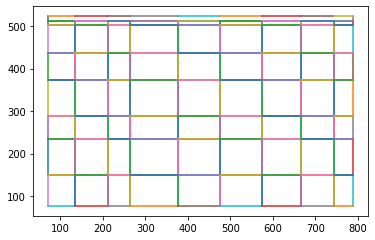

In [14]:
camelot.plot(tables1[0], kind='grid')
plt.show()

In [15]:
len(tables_camelot)

57

In [16]:
tables_camelot[2].df

,0,1,2,3,4,5,6,7,8
0,Molecular tests (rRT-PCR),,,,,,,,
1,Type,Organisation,Date,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
2,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,99</s>",13 Jan 2020,Primer and Probe First line screening assay: E gene assay Confirmatory assay: RdRp gene assay Additional confirmatory assay: N gene assay,"First line screening assay Technical LOD: 5.2 RNA copies/reaction, at 95% hit rate 95% CI: 3.7-9.6 RNA copies/reaction. Confirmatory assay Technical LOD: 3.8 RNA copies/reaction, at 95% hit rate 95% CI: 2.7-7.6 RNA copies/reaction. Additional confirmatory assay Technical LOD: 8.3 RNA copies/reaction, at 95% hit rate; 95% CI: 6.1-16.3 RNA copies/reaction.","Chemical stability No positive signal detected for non-specific reactivity of oligonucleotides. Cross-reactivity with other coronaviruses No reactivity with any of three assays for five coronaviruses: (HCoV) -229E, -NL63, -OC43, -HKU1, and MERS-CoV Tests of human clinical samples previously tested to contain respiratory viruses All tests returned negative results for all 75 samples.",Available • SARS-CoV genomic RNA as positive control.,47 min 15 sec of cycle time (plus probe) for each assay,(no info)
3,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,12</s>",17 Jan 2020,Primer and Probe First line screening assay: E gene assay Confirmatory assay: RdRp gene assay,"First line screening assay Technical LOD: 5.2 RNA copies/reaction, at 95% hit rate 95% CI: 3.7-9.6 RNA copies/reaction. Confirmatory assay Technical LOD: 3.8 RNA copies/reaction, at 95% hit rate 95% CI: 2.7-7.6 RNA copies/reaction. (Preliminary experiment compared single probe assay for SARS-CoV with single probe assay for SARS-CoV-2.)","Chemical stability No positive signal detected for non-specific reactivity of oligonucleotides. Cross-reactivity with other coronaviruses No reactivity with any of three assays for five coronaviruses: (HCoV) -229E, -NL63, -OC43, -HKU1, and MERS-CoV Tests of human clinical samples previously tested to contain respiratory viruses All tests returned negative results for all 75 samples.",Available • SARS-CoV genomic RNA as positive control. • Synthetic control RNA for SARS-CoV-2 E gene assay is available via EVAg. • Synthetic control for SARS-CoV-2 RdRp is expected to be available via EVAg from Jan 21st onward.,47 min 15 sec of cycle time (plus probe) for each assay,(no info)
4,rRT-PCR,"School of Public Health, The University",16 Jan 2020,Primer and Probe,Positive control using SARS-CoV RNA Wide dynamic range of 2<s>-4</s> to 2000 TCID<s>50</s>/reaction.,Exclusivity Negative results against all of these preparations:,Available • Positive control (Available from HKU),28 min 40 sec of cycle time for each assay,(no info)


In [17]:
tables_camelot[0].df.shape[1] 

1

In [18]:
tables_camelot[3].parsing_report

{'accuracy': 99.79, 'whitespace': 20.63, 'order': 1, 'page': 14}

In [19]:
# tests_df = pd.DataFrame()
# for i in range(0, 43):
#     tests_df = pd.concat([tests_df, tables_camelot[i].df])

In [20]:
tests_df = pd.DataFrame()
for i in tables_camelot:
    if i.df.shape[1] == 9:
        tests_df = pd.concat([tests_df, i.df])

In [21]:
tests_df

,0,1,2,3,4,5,6,7,8
0,Molecular tests (rRT-PCR),,,,,,,,
1,Type,Organisation,Date,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
2,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,99</s>",13 Jan 2020,Primer and Probe First line screening assay: E gene assay Confirmatory assay: RdRp gene assay Additional confirmatory assay: N gene assay,"First line screening assay Technical LOD: 5.2 RNA copies/reaction, at 95% hit rate 95% CI: 3.7-9.6 RNA copies/reaction. Confirmatory assay Technical LOD: 3.8 RNA copies/reaction, at 95% hit rate 95% CI: 2.7-7.6 RNA copies/reaction. Additional confirmatory assay Technical LOD: 8.3 RNA copies/reaction, at 95% hit rate; 95% CI: 6.1-16.3 RNA copies/reaction.","Chemical stability No positive signal detected for non-specific reactivity of oligonucleotides. Cross-reactivity with other coronaviruses No reactivity with any of three assays for five coronaviruses: (HCoV) -229E, -NL63, -OC43, -HKU1, and MERS-CoV Tests of human clinical samples previously tested to contain respiratory viruses All tests returned negative results for all 75 samples.",Available • SARS-CoV genomic RNA as positive control.,47 min 15 sec of cycle time (plus probe) for each assay,(no info)
3,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,12</s>",17 Jan 2020,Primer and Probe First line screening assay: E gene assay Confirmatory assay: RdRp gene assay,"First line screening assay Technical LOD: 5.2 RNA copies/reaction, at 95% hit rate 95% CI: 3.7-9.6 RNA copies/reaction. Confirmatory assay Technical LOD: 3.8 RNA copies/reaction, at 95% hit rate 95% CI: 2.7-7.6 RNA copies/reaction. (Preliminary experiment compared single probe assay for SARS-CoV with single probe assay for SARS-CoV-2.)","Chemical stability No positive signal detected for non-specific reactivity of oligonucleotides. Cross-reactivity with other coronaviruses No reactivity with any of three assays for five coronaviruses: (HCoV) -229E, -NL63, -OC43, -HKU1, and MERS-CoV Tests of human clinical samples previously tested to contain respiratory viruses All tests returned negative results for all 75 samples.",Available • SARS-CoV genomic RNA as positive control. • Synthetic control RNA for SARS-CoV-2 E gene assay is available via EVAg. • Synthetic control for SARS-CoV-2 RdRp is expected to be available via EVAg from Jan 21st onward.,47 min 15 sec of cycle time (plus probe) for each assay,(no info)
4,rRT-PCR,"School of Public Health, The University",16 Jan 2020,Primer and Probe,Positive control using SARS-CoV RNA Wide dynamic range of 2<s>-4</s> to 2000 TCID<s>50</s>/reaction.,Exclusivity Negative results against all of these preparations:,Available • Positive control (Available from HKU),28 min 40 sec of cycle time for each assay,(no info)
0,Molecular tests (rRT-PCR),,,,,,,,
1,Type,Organisation,Date,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
2,,"of Hong Kong (HKU)<s>13,14</s>",,Assay 1 (Target: ORF1b-nsp14 gene) Assay 2 (Target: N gene),,• RNA extracted from cultured viruses • RNA from retrospective human clinical specimens previously tested positive for other infections • RNA from control human clinical specimens,Primers and probes: • HKU-ORF1b-nsp14F • HKU- ORF1b-nsp14R • HKU-ORF1b-nsp141P • HKU-NF • HKU-NR • HKU-NP,,
3,rRT-PCR,"Chinese Center for Disease Control and Prevention, Beijing, China<s>100</s>",21 Jan 2020,Primer and Probe Target 1 (ORF1ab gene) Target 2 (N gene),(no info),(no info),Available,(no info),(no info)
4,RT-PCR,"Department of Medical Sciences, Ministry of Public Health, Thailand<s>101</s>",Jan 2020,With gel electrophoresis,(no info),(no info),Available Primers: • NbatCoV_F1 • NbatCoV_R1,107 min of cycle time,(no info)


Set columns names the same as 2nd row

In [22]:
tests_df.columns = tests_df.iloc[1]

Drop first two rows, which have titles and column names, repectively

In [23]:
tests_df.drop([0,1], inplace = True)

Reset index, in order to have a continuous index starting with 0

In [24]:
tests_df.reset_index(inplace = True, drop = True)

Dropping rows containing sub-titles and rows with only white spaces

In [25]:
tests_df.columns

Index(['Type', 'Organisation', 'Date', 'Test', 'Sensitivity', 'Specificity',
       'Availability', 'Turnaround', 'Costs'],
      dtype='object', name=1)

In [26]:
tests_df = tests_df.loc[~((tests_df.Organisation == "") & 
                          (tests_df.Date == "") & 
                          (tests_df.Test == "") & 
                          (tests_df.Sensitivity == "") & 
                          (tests_df.Specificity == "") & 
                          (tests_df.Availability == "") & 
                          (tests_df.Turnaround == "") & 
                          (tests_df.Costs == "")
                         ) ,:]

Reseting index

In [27]:
tests_df.reset_index(inplace = True, drop = True)

Concatenating rows previously splitted on the original PDF due to page break

Index of broken rows

In [28]:
index_merge = tests_df.loc[(tests_df.Type.shift(-1) == ""), :].index

Dataframe containing only splitted rows

In [29]:
to_merge = tests_df.loc[(tests_df.Type.shift(-1) == "") | (tests_df.Type == ""), :]
to_merge

1,Type,Organisation,Date,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
2,rRT-PCR,"School of Public Health, The University",16 Jan 2020,Primer and Probe,Positive control using SARS-CoV RNA Wide dynamic range of 2<s>-4</s> to 2000 TCID<s>50</s>/reaction.,Exclusivity Negative results against all of these preparations:,Available • Positive control (Available from HKU),28 min 40 sec of cycle time for each assay,(no info)
3,,"of Hong Kong (HKU)<s>13,14</s>",,Assay 1 (Target: ORF1b-nsp14 gene) Assay 2 (Target: N gene),,• RNA extracted from cultured viruses • RNA from retrospective human clinical specimens previously tested positive for other infections • RNA from control human clinical specimens,Primers and probes: • HKU-ORF1b-nsp14F • HKU- ORF1b-nsp14R • HKU-ORF1b-nsp141P • HKU-NF • HKU-NR • HKU-NP,,
11,RT-PCR Kit,"Genosensor, LLC <s>103</s>",,<s>GS COVID-19 RT-PCR Kit</s> Real-time reverse transcription polymerase chain reaction test intended,<s>100% (32/32)</s>,<s>100% (32/32)</s>,Available. EUA issued on 16th April 2020.,(no info),(no info)
12,,,,"for the qualitative detection of nucleic acid from the SARS-CoV-2 in nasopharyngeal/oropharyngeal swabs, nasal swabs, mid-turbinate swabs from individuals suspected of COVID-19. Positive results are indicative of the presence of SARS-CoV-2 RNA.",,,,,
14,RT-PCR Kit,Shanghai Fosun Long March Medical Science Co. Ltd<s>105</s> Manufactured for: Fosun Pharma USA Inc.,,"COVID-19 RT-PCR <s>Detection Kit</s> Real-time RT-PCR for qualitative detection of SARS-CoV-2 ORF1ab, N and E gene targets Real-time RT-PCR test intended for the qualitative detection of nucleic acid from the SARS-CoV-2 in upper and lower respiratory specimens (such as anterior",99.51% (203/204)<s>106</s>,96.44% (379/393)<s>106</s>,Available. EUA issued on 17th April 2020 Received CE mark on 17 March 2020. Received emergency approval from the National Medical Products Administration,Within 2 Hours,(no info)
15,,,,"nasal swabs, mid-turbinate nasal swabs, nasopharyngeal swabs, oropharyngeal swabs, sputum, lower respiratory tract aspirates, bronchoalveolar lavage, and nasopharyngeal wash/aspirate or nasal aspirate) from individuals suspected of COVID-19. Results are for the identification of SARS-CoV-2 RNA. The SARS-CoV-2 RNA is generally detectable in upper and lower respiratory specimens during the acute phase of infection. Positive results are indicative of the presence of SARS-CoV-2 RNA.",,,(NMPA) on 27 March 2020. Approved for inclusion in the Australian Register of Therapeutic Goods on 8 May 2020<s>107</s>,,
21,RT-PCR,Roche<s>123-126</s> Switzerland,31 Jan 2020,Cobas SARS-CoV-2 Test Runs on the Cobas 6800/8800 systems. Tests for two gene targets: ORF1ab & E.,100% (50/50) 50 nasopharyngeal swab clinical samples spiked with cultured SARS-CoV-2 virus Low (1.5x LoD) and moderate (4x LoD),100% (100/100) 100 nasopharyngeal swab clinical samples serve as negative controls.<s>126</s>,Commercially available. Obtained EUA approval from US FDA 13 Mar 2020.<s>125</s> CE Mark for IVD.,3 hr 30 min,(no info)
22,,,,,contrived positive samples <s>126</s>,,Approved for inclusion on the Australia’s ARTG on 20 March 2020. Date of HSA Provisional Authorisation: 19/03/2020<s>127</s>,,
37,RT-PCR,"Fulgent Therapeutics, LLC<s>168</s> USA",11 Mar 2020,COVID-19 Virus Testing by RT-PCR Real-time RT-PCR for the qualitative detection of SARS-CoV-2 N1 and N2,<s>100% (30/30)</s>,<s>100% (64/64)</s>,Submitted to US FDA for EUA Approval. Commercially Available<s>169</s>,(no info),(no info)
38,,,,"genes in upper respiratory specimens (nasal, nasopharyngeal, and oropharyngeal direct swab specimens)",,,FDA EUA issued on 15/5/2020<s>170</s>,,


Dataframe containing merged rows

In [38]:
merged = to_merge.apply(lambda x: x.str.cat(x.shift(-1), sep = " "), axis = 0).loc[index_merge]
merged

1,Type,Organisation,Date,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
2,rRT-PCR,"School of Public Health, The University of Hong Kong (HKU)<s>13,14</s>",16 Jan 2020,Primer and Probe Assay 1 (Target: ORF1b-nsp14 gene) Assay 2 (Target: N gene),Positive control using SARS-CoV RNA Wide dynamic range of 2<s>-4</s> to 2000 TCID<s>50</s>/reaction.,Exclusivity Negative results against all of these preparations: • RNA extracted from cultured viruses • RNA from retrospective human clinical specimens previously tested positive for other infections • RNA from control human clinical specimens,Available • Positive control (Available from HKU) Primers and probes: • HKU-ORF1b-nsp14F • HKU- ORF1b-nsp14R • HKU-ORF1b-nsp141P • HKU-NF • HKU-NR • HKU-NP,28 min 40 sec of cycle time for each assay,(no info)
11,RT-PCR Kit,"Genosensor, LLC <s>103</s>",,"<s>GS COVID-19 RT-PCR Kit</s> Real-time reverse transcription polymerase chain reaction test intended for the qualitative detection of nucleic acid from the SARS-CoV-2 in nasopharyngeal/oropharyngeal swabs, nasal swabs, mid-turbinate swabs from individuals suspected of COVID-19. Positive results are indicative of the presence of SARS-CoV-2 RNA.",<s>100% (32/32)</s>,<s>100% (32/32)</s>,Available. EUA issued on 16th April 2020.,(no info),(no info)
14,RT-PCR Kit,Shanghai Fosun Long March Medical Science Co. Ltd<s>105</s> Manufactured for: Fosun Pharma USA Inc.,,"COVID-19 RT-PCR <s>Detection Kit</s> Real-time RT-PCR for qualitative detection of SARS-CoV-2 ORF1ab, N and E gene targets Real-time RT-PCR test intended for the qualitative detection of nucleic acid from the SARS-CoV-2 in upper and lower respiratory specimens (such as anterior nasal swabs, mid-turbinate nasal swabs, nasopharyngeal swabs, oropharyngeal swabs, sputum, lower respiratory tract aspirates, bronchoalveolar lavage, and nasopharyngeal wash/aspirate or nasal aspirate) from individuals suspected of COVID-19. Results are for the identification of SARS-CoV-2 RNA. The SARS-CoV-2 RNA is generally detectable in upper and lower respiratory specimens during the acute phase of infection. Positive results are indicative of the presence of SARS-CoV-2 RNA.",99.51% (203/204)<s>106</s>,96.44% (379/393)<s>106</s>,Available. EUA issued on 17th April 2020 Received CE mark on 17 March 2020. Received emergency approval from the National Medical Products Administration (NMPA) on 27 March 2020. Approved for inclusion in the Australian Register of Therapeutic Goods on 8 May 2020<s>107</s>,Within 2 Hours,(no info)
21,RT-PCR,Roche<s>123-126</s> Switzerland,31 Jan 2020,Cobas SARS-CoV-2 Test Runs on the Cobas 6800/8800 systems. Tests for two gene targets: ORF1ab & E.,100% (50/50) 50 nasopharyngeal swab clinical samples spiked with cultured SARS-CoV-2 virus Low (1.5x LoD) and moderate (4x LoD) contrived positive samples <s>126</s>,100% (100/100) 100 nasopharyngeal swab clinical samples serve as negative controls.<s>126</s>,Commercially available. Obtained EUA approval from US FDA 13 Mar 2020.<s>125</s> CE Mark for IVD. Approved for inclusion on the Australia’s ARTG on 20 March 2020. Date of HSA Provisional Authorisation: 19/03/2020<s>127</s>,3 hr 30 min,(no info)
37,RT-PCR,"Fulgent Therapeutics, LLC<s>168</s> USA",11 Mar 2020,"COVID-19 Virus Testing by RT-PCR Real-time RT-PCR for the qualitative detection of SARS-CoV-2 N1 and N2 genes in upper respiratory specimens (nasal, nasopharyngeal, and oropharyngeal direct swab specimens)",<s>100% (30/30)</s>,<s>100% (64/64)</s>,Submitted to US FDA for EUA Approval. Commercially Available<s>169</s> FDA EUA issued on 15/5/2020<s>170</s>,(no info),(no info)
42,RT-PCR,"Quidel<s>181,182</s> USA",17 Mar 2020,Lyra SARS-CoV-2 Assay Identification of the SARS-CoV-2 virus occurs by the use of target specific primers and fluorescent-labeled 102 probes that hybridize to a conserved region of the non-structural Polyprotein (pp1ab) of the SARS-CoV-2 virus.<s>183</s>,100% (92/92) 92 nasopharyngeal swab specimens were spiked w

Replacing splitted rows with merged ones

In [31]:
tests_df.loc[(tests_df.Type.shift(-1) == ""), :] = merged

C:\Users\edidd\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\edidd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
tests_df = tests_df.loc[tests_df.Type != "", :]

In [33]:
tests_df

1,Type,Organisation,Date,Test,Sensitivity,Specificity,Availability,Turnaround,Costs
0,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,99</s>",13 Jan 2020,Primer and Probe First line screening assay: E gene assay Confirmatory assay: RdRp gene assay Additional confirmatory assay: N gene assay,"First line screening assay Technical LOD: 5.2 RNA copies/reaction, at 95% hit rate 95% CI: 3.7-9.6 RNA copies/reaction. Confirmatory assay Technical LOD: 3.8 RNA copies/reaction, at 95% hit rate 95% CI: 2.7-7.6 RNA copies/reaction. Additional confirmatory assay Technical LOD: 8.3 RNA copies/reaction, at 95% hit rate; 95% CI: 6.1-16.3 RNA copies/reaction.","Chemical stability No positive signal detected for non-specific reactivity of oligonucleotides. Cross-reactivity with other coronaviruses No reactivity with any of three assays for five coronaviruses: (HCoV) -229E, -NL63, -OC43, -HKU1, and MERS-CoV Tests of human clinical samples previously tested to contain respiratory viruses All tests returned negative results for all 75 samples.",Available • SARS-CoV genomic RNA as positive control.,47 min 15 sec of cycle time (plus probe) for each assay,(no info)
1,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,12</s>",17 Jan 2020,Primer and Probe First line screening assay: E gene assay Confirmatory assay: RdRp gene assay,"First line screening assay Technical LOD: 5.2 RNA copies/reaction, at 95% hit rate 95% CI: 3.7-9.6 RNA copies/reaction. Confirmatory assay Technical LOD: 3.8 RNA copies/reaction, at 95% hit rate 95% CI: 2.7-7.6 RNA copies/reaction. (Preliminary experiment compared single probe assay for SARS-CoV with single probe assay for SARS-CoV-2.)","Chemical stability No positive signal detected for non-specific reactivity of oligonucleotides. Cross-reactivity with other coronaviruses No reactivity with any of three assays for five coronaviruses: (HCoV) -229E, -NL63, -OC43, -HKU1, and MERS-CoV Tests of human clinical samples previously tested to contain respiratory viruses All tests returned negative results for all 75 samples.",Available • SARS-CoV genomic RNA as positive control. • Synthetic control RNA for SARS-CoV-2 E gene assay is available via EVAg. • Synthetic control for SARS-CoV-2 RdRp is expected to be available via EVAg from Jan 21st onward.,47 min 15 sec of cycle time (plus probe) for each assay,(no info)
2,rRT-PCR,"School of Public Health, The University of Hong Kong (HKU)<s>13,14</s>",16 Jan 2020,Primer and Probe Assay 1 (Target: ORF1b-nsp14 gene) Assay 2 (Target: N gene),Positive control using SARS-CoV RNA Wide dynamic range of 2<s>-4</s> to 2000 TCID<s>50</s>/reaction.,Exclusivity Negative results against all of these preparations: • RNA extracted from cultured viruses • RNA from retrospective human clinical specimens previously tested positive for other infections • RNA from control human clinical specimens,Available • Positive control (Available from HKU) Primers and probes: • HKU-ORF1b-nsp14F • HKU- ORF1b-nsp14R • HKU-ORF1b-nsp141P • HKU-NF • HKU-NR • HKU-NP,28 min 40 sec of cycle time for each assay,(no info)
4,rRT-PCR,"Chinese Center for Disease Control and Prevention, Beijing, China<s>100</s>",21 Jan 2020,Primer and Probe Target 1 (ORF1ab gene) Target 2 (N gene),(no info),(no info),Available,(no info),(no info)
5,RT-PCR,"Department of Medical Sciences, Ministry of Public Health, Thailand<s>101</s>",Jan 2020,With gel electrophoresis,(no info),(no info),Available Primers: • NbatCoV_F1 • NbatCoV_R1,107 min of cycle time,(no info)
6,RT-PCR,"National Institute of Infectious Diseases, Japan<s>102</s>",23 Jan 2020,With gel electrophoresis (Nested RT-PCR) Primer and Probe (Real-time RT-PCR),(no info),(no info),Available Primers and probes: • NIID_2019-nCOV_N_F2 • NIID_2019-nCOV_N_R2 • NIID_2019-nCOV_N_P2,81 min for Nested RT-PCR 95 min for Real-time RT-PCR,(no info)
7,rRT-PCR,"Centers for Disease Control and Prevention, Atlanta, USA<s>15,16</s>",24 Jan 2020,Primer and Probe 3 N gene targets 1 human RN

In [34]:
tests_df.reset_index(inplace = True, drop = True)

In [35]:
tests_df = tests_df.replace("", np.nan)

In [36]:
tests_df.isnull().any()

1
Type            False
Organisation    False
Date             True
Test            False
Sensitivity      True
Specificity      True
Availability    False
Turnaround       True
Costs            True
dtype: bool

## Pre-processing data frame

In [39]:
tests_df_metrics = tests_df.loc[:,("Type", "Organisation", "Sensitivity", "Specificity")]

In [40]:
tests_df_metrics = tests_df_metrics.replace("nan", np.nan)

In [41]:
tests_df_metrics = tests_df_metrics.replace("(no info)", np.nan)

In [42]:
tests_df_metrics = tests_df_metrics.dropna(how= "all", subset=["Sensitivity", "Specificity"])

In [43]:
tests_df_metrics.reset_index(inplace = True, drop = True)

### Cleaning out values for sensitivity and specificity

In [69]:
tests_df_metrics

1,Type,Organisation,Sensitivity,Specificity,Category,sub_category
1,rRT-PCR,"Charité Institute of Virology, Berlin, Germany <s>1,12</s>",100.00,100.00,Molecular,PCR
2,rRT-PCR,"School of Public Health, The University of Hong Kong (HKU)<s>13,14</s>",100.00,100.00,Molecular,PCR
3,rRT-PCR,"Institut Pasteur, Paris, France<s>10</s>",100.00,100.00,Molecular,PCR
4,RT-PCR Kit,"Genosensor, LLC <s>103</s>",100.00,100.00,Molecular,PCR
5,RT-PCR Kit,KorvaLabs Inc. <s>104</s>,100.00,100.00,Molecular,PCR
6,RT-PCR Kit,"Genosensor, LLC <s>103</s>",100.00,100.00,Molecular,PCR
7,RT-PCR Kit,KorvaLabs Inc. <s>104</s>,100.00,100.00,Molecular,PCR
8,RT-PCR Kit,Shanghai Fosun Long March Medical Science Co. Ltd<s>105</s> Manufactured for: Fosun Pharma USA Inc.,99.51,96.44,Molecular,PCR
9,RT-PCR assay,"Rhoenix, Inc. <s>108</s>",100.00,100.00,Molecular,PCR
10,RT-PCR assay,"LabGenomics Co., Ltd <s>110</s>",100.00,100.00,Molecular,PCR


In [ ]:
# rule = re.compile("[\d,.]?[\d,.]*[\d,.]*[\d,.]*[\d,.]*%|IgM|IgG|IgA")

In [ ]:
# rule = re.compile("(\d\d(\.\d\d?)?%|1?00%)")

Regex rule to get the sensitivitz and specificitz values out of the long texts

In [45]:
rule = re.compile("(\d?\d\d(\.\d\d?)?%)")

In [46]:
tests_df_metrics.Sensitivity = tests_df_metrics.Sensitivity.apply(lambda x: rule.findall(str(x)))

In [47]:
tests_df_metrics.Specificity = tests_df_metrics.Specificity.apply(lambda x: rule.findall(str(x)))

The function *groupzero* returns only the output of regex function *findall* which corresponds to the regex *rule* as a whole

In [48]:
def groupzero(x):
    list = []
    for i in x:
        list.append(i[0])
    return(list)

The function *maxvalue* returns the max value of all outputs after applying *groupzero*

In [49]:
def maxvalue(x):
    if x:
        return((np.array([float(i.replace("%", "")) for i in x])).max())
    else:
        return(np.nan)

In [51]:
tests_df_metrics.Sensitivity = tests_df_metrics.Sensitivity.apply(lambda x: groupzero(x))

In [52]:
tests_df_metrics.Specificity = tests_df_metrics.Specificity.apply(lambda x: groupzero(x))

The 4 first tests report in the text to have 100% sensitivity and specificity.

In [53]:
tests_df_metrics.iloc[0][2] = tests_df_metrics.iloc[0][3] = ["100%"]

In [54]:
tests_df_metrics.iloc[1][2] = tests_df_metrics.iloc[1][3] = ["100%"]

In [55]:
tests_df_metrics.iloc[2][2] = tests_df_metrics.iloc[2][3] = ["100%"]

In [56]:
tests_df_metrics.iloc[3][2] = tests_df_metrics.iloc[3][3] = ["100%"]

In [ ]:
# tests_df_3.Sensitivity = tests_df_3.Sensitivity.apply(lambda x: np.nan if len(x)==0 else x)

In [ ]:
# tests_df_3.Specificity = tests_df_3.Specificity.apply(lambda x: np.nan if len(x)==0 else x)

Selecting only the highest specificty and sensitivity values for a specific test. Different values of sensitivity and specificity are sometimes given for serological tests in the following cases:
- Two or three values reffering to: IgM / IgG / IgA. Selecting the highest value means at least one of the two (or three) antibody tests has the given metric.
- Different values accounting for different stages of the infection. The highest value accounts only for a specific infection stage.

In [57]:
tests_df_metrics.Sensitivity = tests_df_metrics.Sensitivity.apply(lambda x: maxvalue(x))

In [58]:
tests_df_metrics.Specificity = tests_df_metrics.Specificity.apply(lambda x: maxvalue(x))

Dropping rows which have both sensitivity and specificity as NA

In [59]:
tests_df_metrics.dropna(how = "all", subset = ["Sensitivity", "Specificity"], inplace = True )

Deleting repeted tests

In [60]:
tests_df_metrics.drop(0, inplace = True)

Adding column for test category

In [62]:
tests_df_metrics["Category"] = "Molecular"

In [63]:
tests_df_metrics.loc[92:, "Category"] = "Serological"

Adding sub-categories

In [64]:
rule = re.compile("PCR")
tests_df_metrics["sub_category"] = tests_df_metrics.Type.apply(lambda x: rule.findall(x)[0] if rule.findall(x) else "")

In [65]:
def sub_cat(x, df):
    rule = re.compile(x.lower())
    df.loc[
        df.Type.apply(
            lambda x: rule.findall(x.lower())[0] if rule.findall(x.lower()) else ""
        ) == x.lower(), 
        "sub_category"
    ] = x 

In [66]:
sub_cat("Total antibody", tests_df_metrics)
sub_cat("IgG", tests_df_metrics)
sub_cat("IgM", tests_df_metrics)
sub_cat("IgA", tests_df_metrics)
sub_cat("IgG/IgM", tests_df_metrics)
sub_cat("IgA/IgG", tests_df_metrics)

Dropping other tests

In [67]:
tests_df_metrics.replace("", np.nan, inplace = True)

In [68]:
tests_df_metrics.dropna(subset = ["sub_category"], inplace = True)

Writing pre-processed dataframe to csv

In [103]:
tests_df_metrics.to_csv("C:\\Users\\edidd\\Documents\\Ubiqum\\Data Analytics Course\\covid19\\data\\tests_df_metrics.csv")

## Boxplots for sensitivity / specificity per test categories

In [92]:
fig = px.box(tests_df_metrics, y="Sensitivity", color="sub_category")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

fig.update_layout(
    title = 
    {
        'text': "Sensitivity of COVID-19 tests",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    }, 
    legend_orientation="v"
)
pio.show(fig)

In [91]:
fig = px.box(tests_df_metrics, y="Specificity", color="sub_category")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    title = 
    {
        'text': "Specificity of COVID-19 tests",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    }, 
    legend_orientation="v"
)
pio.show(fig)

In [86]:
fig = px.box(tests_df_metrics, y="Sensitivity", color="Category")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(title= "Sensitivity of COVID-19 tests")
fig.update_layout(
    title = 
    {
        'text': "Sensitivity of COVID-19 tests",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }, 
    legend_orientation="v"
)
pio.show(fig)

In [93]:
fig = px.box(tests_df_metrics, y="Specificity", color="Category")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

fig.update_layout(
    title = 
    {
        'text': "Specificity of COVID-19 tests",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    }, 
    legend_orientation="v"
)
pio.show(fig)

### Calculating the median of sensitivity /specificity for each test types

In [94]:
sub_categories = tests_df_metrics.sub_category.unique()
sub_categories

array(['PCR', 'Total antibody', 'IgG/IgM', 'IgM', 'IgG', 'IgA/IgG'],
      dtype=object)

In [95]:
metrics = ["Sensitivity", "Specificity"]

In [97]:
metrics_summary = pd.DataFrame(columns= metrics, index= sub_categories)
for i, sc in enumerate(sub_categories):
    for j, metric in enumerate(metrics):
        metrics_summary.iloc[i, j] = \
        tests_df_metrics.loc[tests_df_metrics.sub_category == sc, metric].median()

In [140]:
metrics_summary = metrics_summary / 100
metrics_summary

,Sensitivity,Specificity
PCR,1,1
Total antibody,0.973,0.99705
IgG/IgM,0.972,0.9775
IgM,0.873,1
IgG,0.9756,1
IgA/IgG,1,0.99


In [99]:
categories = tests_df_metrics.Category.unique()
categories

array(['Molecular', 'Serological'], dtype=object)

In [100]:
metrics_summary_cat = pd.DataFrame(columns= metrics, index= categories)
for i, c in enumerate(categories):
    for j, metric in enumerate(metrics):
        metrics_summary_cat.iloc[i, j] = \
        tests_df_metrics.loc[tests_df_metrics.Category == c, metric].median()

In [102]:
metrics_summary_cat

,Sensitivity,Specificity
Molecular,100,100
Serological,97.2,99.4


## Probability of being sick when tested positive

As of 15.06.2020 there are 126 reported active cases of COVID-19 in Bremen city. However, according to different studies, the actual number of cases can be estimated to be between 10 to 20 times higher.

The population of Bremen city is estimated to be around 570k by the end of 2019.

Therefore, the probability of being sick of COVID-19 in Bremen city is:

In [166]:
126 * 20 / 570000

0.004421052631578947

In [163]:
prob_sick = np.arange(0.0001, .0201, .0001)

In [164]:
prob_healthy = 1 - prob_sick

In [169]:
fig = go.Figure()
                       
for i, test in enumerate(metrics_summary.index):
    metrics = metrics_summary.loc[test]
    fig.add_trace(go.Scatter(x= prob_sick,
                             y= metrics.Sensitivity*prob_sick/(metrics.Sensitivity*prob_sick + (1 - metrics.Specificity)*prob_healthy),
                                mode= "lines", 
                                name= test)
                  )

fig.update_layout(title= {"text": "Probability of having COVID-19 when tested positive", 
                          'y':.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'middle'
                         }, 
                 xaxis_title= "Probability of having COVID-19")
fig.show()

In [167]:
fig = go.Figure()
                       
for i, test in enumerate(metrics_summary.index):
    metrics = metrics_summary.loc[test]
    fig.add_trace(go.Scatter(x= prob_sick,
                             y= metrics.Specificity*prob_healthy/(
                                 metrics.Specificity*prob_healthy + (1 - metrics.Sensitivity)*prob_sick),
                                mode= "lines", 
                                name= test)
                  )

fig.update_layout(title= "Probabilities of being healthy when tested negative", 
                 xaxis_title= "Probabilities of being sick")
fig.show()